# Google Drive Binding

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [3]:
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

import matplotlib.pyplot as plt
from warnings import filterwarnings
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

# Data Preparation
### The code loads image data for training and testing, preprocesses it, and prepares it for model training.

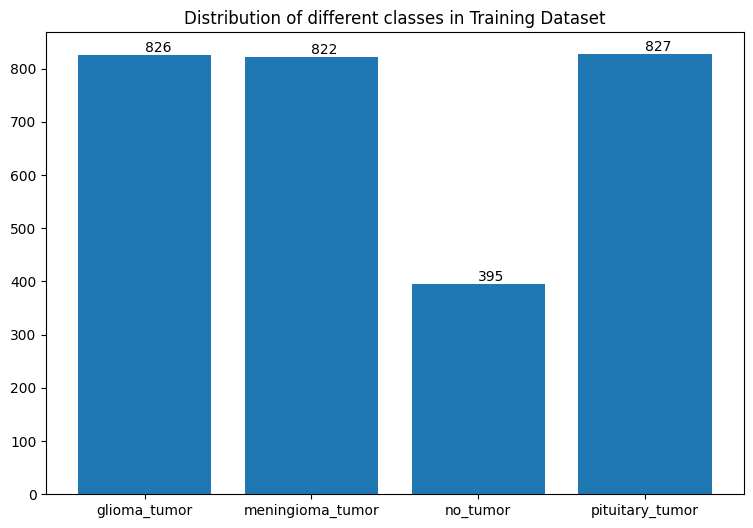

Training glioma_tumor images are: 826
Training meningioma_tumor images are: 822
Training no_tumor images are: 395
Training pituitary_tumor images are: 827


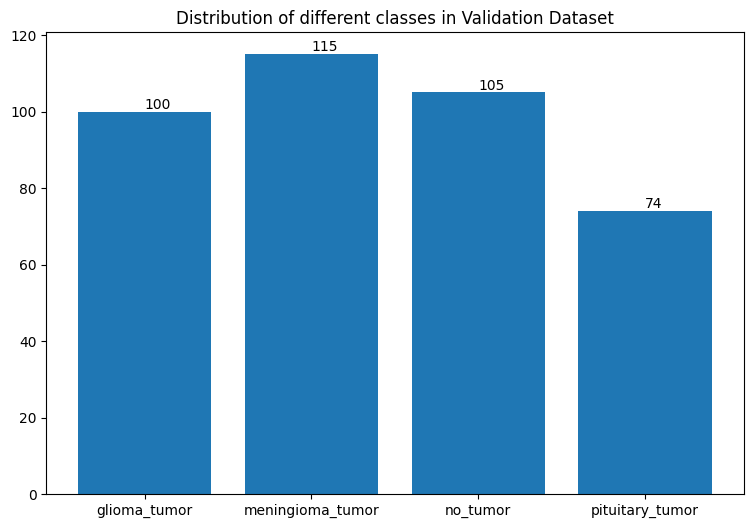

Validation glioma_tumor images are: 100
Validation meningioma_tumor images are: 115
Validation no_tumor images are: 105
Validation pituitary_tumor images are: 74


In [4]:
# Paths to the training and validation datasets
train_datasets = "/content/drive/MyDrive/Brain-Tumor-Classification-Data/Training/"
validation_datasets = "/content/drive/MyDrive/Brain-Tumor-Classification-Data/Testing/"

# Function to visualize the distribution of images in each class of the dataset
def visualize_img_distribution(dataset_path, dataset_name):
  # List of subfolders representing different brain tumor labels
  image_folder = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
  # Create dictionary to store the number of images in each class
  num_imgs = {}

  # Count the number of images in each class
  for i in image_folder:
      num_images = len(os.listdir(dataset_path + i + '/'))
      num_imgs[i]=num_images

  # Plotting the distribution of images in each class
  plt.figure(figsize=(9, 6))
  bars = plt.bar(range(len(num_imgs)), list(num_imgs.values()), align='center')
  plt.xticks(range(len(num_imgs)), list(num_imgs.keys()))
  plt.title('Distribution of different classes in ' + dataset_name + ' Dataset')

  # Add total number of images of each class on top of each bar
  for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

  # Display bar chart
  plt.show()

  # Print the number of images in each class
  for i in image_folder:
    print(dataset_name + ' {} images are: '.format(i)+str(len(os.listdir(dataset_path + i + '/'))))

# Call the function for both training and validation datasets
visualize_img_distribution(train_datasets, "Training")
visualize_img_distribution(validation_datasets, "Validation")

In [5]:
# Initialize lists to store training data and labels
X_train = [] # for storing images
Y_train = [] # for storing corresponding labels

# set desired img size
image_size = 150

# Define the labels/classes
tumor_labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# Loop through each label/class
for i in tumor_labels:
    # Get the path to the folder containing training images
    folderPath = os.path.join('/content/drive/MyDrive/Brain-Tumor-Classification-Data/Training',i)

    # Loop through each image in the current label's folder
    for j in os.listdir(folderPath):
        # Read the image
        img = cv2.imread(os.path.join(folderPath,j))
        # Resize the image to the desired size
        img = cv2.resize(img,(image_size,image_size))

        # Append the image and corresponding label to the lists
        X_train.append(img)
        Y_train.append(i)

# Repeat the same process for the testing dataset
for i in tumor_labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain-Tumor-Classification-Data/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

# Convert lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
# Shuffle the training data and labels
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)

# Check the shape of the shuffled training data
X_train.shape

(3264, 150, 150, 3)

# Color Palletes


In [7]:
# Define a dark palette with two colors
dark_palette = ["#313131", '#AEAEAE']

# Define a red palette with two colors
red_palette = ['#9E1717', '#D35151']

# Define a green palette with five colors
green_palette = ['#0A6921','#1A8828','#429B46','#64AD62','#94C58C']

# Label Data Visualization

### A visualization section displays sample images from each label to provide an overview of the dataset.

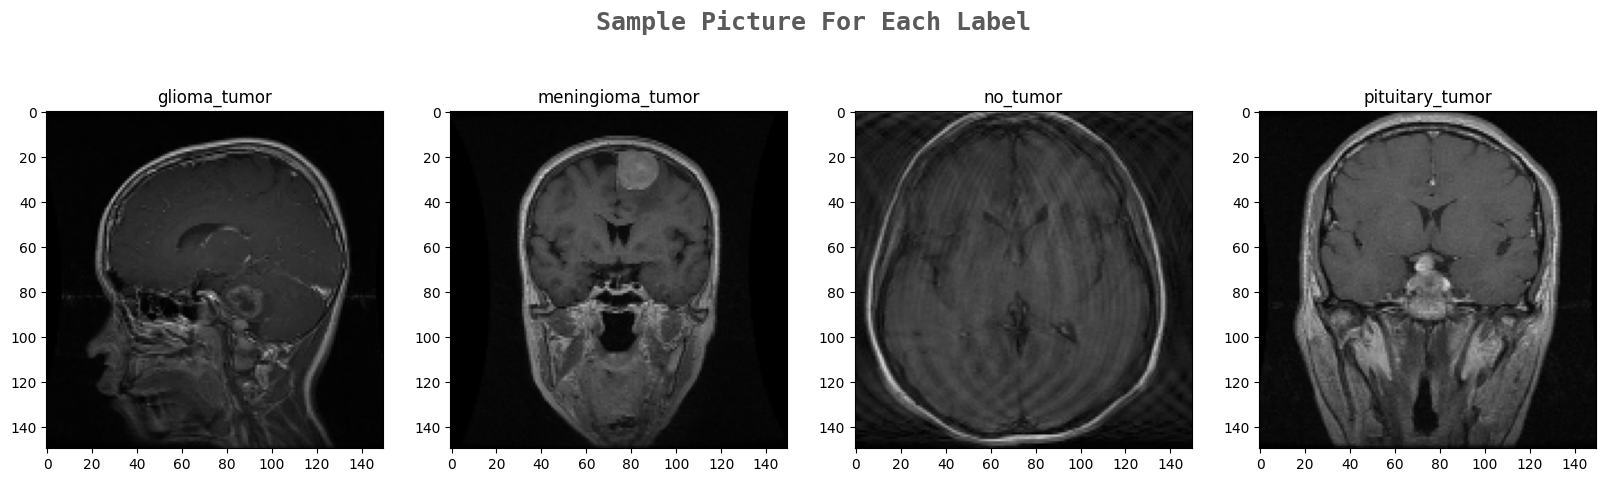

In [8]:
# Initialize a counter variable
n = 0


# Create a figure with 1 row and 4 columns of subplots, and set the figure size
fig, ax = plt.subplots(1,4,figsize=(20,20))

# Add heading to the figure
fig.text(s='Sample Picture For Each Label',size=18,fontweight='bold',
             fontname='monospace',color=dark_palette[0],y=0.62,x=0.4,alpha=0.8)

# Iterate over each label in the tumor_labels list
for i in tumor_labels:
    j = 0 # Initialize a loop counter

    # Loop until a sample image corresponding to the current label is found
    while True :
        if Y_train[j]==i:
            # Display the image corresponding to the current label on the n-th subplot
            ax[n].imshow(X_train[j])
            ax[n].set_title(Y_train[j]) # Set the title of the subplot
            n = n + 1 # Move to the next subplot
            break # Exit the loop once a sample image is displayed
        j = j + 1 # Move to the next image in the dataset

In [9]:
# Split the data into training and testing sets
# test_size=0.1: 10% of the data will be used for testing, and 90% for training
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [10]:
# Convert labels from string format to numerical format and then to one-hot encoded format for training data
y_train_new = [] # Initialize a list to store converted labels
for i in y_train:
    # Get the index of the label in the tumor_labels list and append it to y_train_new
    y_train_new.append(tumor_labels.index(i))
y_train=y_train_new # Assign the converted labels back to y_train
y_train = tf.keras.utils.to_categorical(y_train) # Convert numerical labels to one-hot encoded format

# Convert labels from string format to numerical format and then to one-hot encoded format for testing data
y_test_new = [] # Initialize a list to store converted labels
for i in y_test:
    # Get the index of the label in the tumor_labels list and append it to y_test_new
    y_test_new.append(tumor_labels.index(i))
y_test=y_test_new # Assign the converted labels back to y_test
y_test = tf.keras.utils.to_categorical(y_test) # Convert numerical labels to one-hot encoded format

# Model Architecture

### The model architecture section defines the convolutional neural network (CNN) architecture for brain tumor classification.

Three models are presented. Choose the one you would like to test.

### Model 1

In [11]:
# Define the model architecture
model1 = Sequential()

# Add the first convolutional layer with 32 filters, each of size (3,3), using ReLU activation function
# Specify the input shape as (150, 150, 3) for images with height 150, width 150, and 3 color channels (RGB)
model1.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))

# Add another convolutional layer with 64 filters, each of size (3,3), using ReLU activation function
model1.add(Conv2D(64,(3,3),activation='relu'))

# Add max pooling layer with pool size (2,2) to reduce spatial dimensions
model1.add(MaxPooling2D(2,2))

# Add dropout layer with dropout rate 0.3 to prevent overfitting
model1.add(Dropout(0.3))

# Add more convolutional layers with ReLU activation and dropout layers
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(Dropout(0.3))

# Add max pooling layer with pool size (2,2)
model1.add(MaxPooling2D(2,2))

# Add more convolutional layers with ReLU activation and dropout layers
model1.add(Dropout(0.3))
model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.3))

# Add more convolutional layers with ReLU activation and dropout layers
model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(Conv2D(256,(3,3),activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.3))

# Flatten the output to feed into fully connected layers
model1.add(Flatten())

# Add fully connected layers with ReLU activation and dropout layers
model1.add(Dense(512,activation = 'relu'))
model1.add(Dense(512,activation = 'relu'))
model1.add(Dropout(0.3))

# Output layer with 4 units (for 4 classes) and softmax activation for multi-class classification
model1.add(Dense(4,activation='softmax'))

In [14]:
# Display a summary of the model architecture
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

### Model 2 (Modified Model 1)

In [12]:
# Define the model architecture
model2 = Sequential()

# Add the first convolutional layer with 32 filters, each of size (3,3), using ReLU activation function
# Specify the input shape as (150, 150, 3) for images with height 150, width 150, and 3 color channels (RGB)
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# Add max pooling layer with pool size (2,2) to reduce spatial dimensions
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with dropout rate 0.25 to prevent overfitting
model2.add(Dropout(0.25))

# Add another convolutional layer with 64 filters, each of size (3,3), using ReLU activation function
model2.add(Conv2D(64, (3, 3), activation='relu'))

# Add max pooling layer with pool size (2,2) to reduce spatial dimensions
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with dropout rate 0.25 to prevent overfitting
model2.add(Dropout(0.25))

# Flatten the output to feed into fully connected layers
model2.add(Flatten())

# Add fully connected layers with ReLU activation and dropout layers
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))

# Output layer with 4 units (for 4 classes) and softmax activation for multi-class classification
model2.add(Dense(4, activation='softmax'))

In [15]:
# Display a summary of the model architecture
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 36, 36, 64)       

### Model 3 (EfficientNet)

In [13]:
# Load the EfficientNetB0 model pretrained on ImageNet without the top layers
efficientnetB0 = tf.keras.applications.EfficientNetB0(weights='imagenet',
                                                      include_top=False,
                                                      input_shape=(image_size, image_size, 3))


# Build the custom model on top of the EfficientNetB0 base
model3 = efficientnetB0.output
model3 = tf.keras.layers.GlobalAveragePooling2D()(model3)
model3 = tf.keras.layers.Dense(1024,activation='relu')(model3)
model3 = tf.keras.layers.Dropout(rate=0.4)(model3)
model3 = tf.keras.layers.Dense(4,activation='softmax')(model3)
model3 = tf.keras.models.Model(inputs=efficientnetB0.input, outputs = model3)


16705208/16705208 [==============================] - 1s 0us/step


In [16]:
# Display a summary of the model architecture
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 150, 150, 3)          0         ['normalization[0][0]']   

# Model Training


### The code compiles and trains the CNN model using the prepared data.

In [17]:
# Choose Model you want to train:
# model1 = 1
# model2 = 2
# model3 = 3

# choose and set model number
model_number = <choose_model_number>

In [18]:
# Compile the model
# Specify 'categorical_crossentropy' as the loss function for multi-class classification
# Use Adam optimizer for training the model
# Specify 'accuracy' as the metric to evaluate the performance of the model
if model_number == 1:
  model1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
elif model_number == 2:
  model2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
elif model_number == 3:
  model3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
# Train the model on the training data
# epochs=15: Number of epochs for training
# validation_split=0.1: Fraction of the training data to be used as validation data
if model_number == 1:
  history = model1.fit(X_train,y_train,epochs=15,validation_split=0.1)
elif model_number == 2:
  history = model2.fit(X_train,y_train,epochs=15,validation_split=0.1)
elif model_number == 3:
  history = model3.fit(X_train,y_train,epochs=12,validation_split=0.1)

Epoch 1/15
83/83 [==============================] - 181s 2s/step - loss: 86.1764 - accuracy: 0.4669 - val_loss: 1.0808 - val_accuracy: 0.6088
Epoch 2/15
83/83 [==============================] - 170s 2s/step - loss: 0.8974 - accuracy: 0.6633 - val_loss: 0.9423 - val_accuracy: 0.6327
Epoch 3/15
83/83 [==============================] - 171s 2s/step - loss: 0.7131 - accuracy: 0.7223 - val_loss: 0.8056 - val_accuracy: 0.7075
Epoch 4/15
83/83 [==============================] - 181s 2s/step - loss: 0.5804 - accuracy: 0.7673 - val_loss: 0.6741 - val_accuracy: 0.7857
Epoch 5/15
83/83 [==============================] - 173s 2s/step - loss: 0.4899 - accuracy: 0.8229 - val_loss: 0.7297 - val_accuracy: 0.8027
Epoch 6/15
83/83 [==============================] - 175s 2s/step - loss: 0.4115 - accuracy: 0.8464 - val_loss: 0.6628 - val_accuracy: 0.8367
Epoch 7/15
83/83 [==============================] - 179s 2s/step - loss: 0.3338 - accuracy: 0.8820 - val_loss: 0.6566 - val_accuracy: 0.8333
Epoch 8/15
8

# Model Evaluation


### Training history and evaluation metrics such as accuracy and loss are visualized to assess model performance.

In [ ]:
filterwarnings('ignore')

# Create a list of epochs from 0 to 11/14
epochs = [i for i in range(15)]
if model_number == 1:
  epochs = [i for i in range(15)]
elif model_number == 2:
  epochs = [i for i in range(15)]
elif model_number == 3:
  epochs = [i for i in range(12)]

# Create a subplot with 1 row and 2 columns, and set the figure size
fig, ax = plt.subplots(1,2,figsize=(14,7))


# Extract training and validation accuracy and loss from history
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Add heading to the figure
fig.text(s='Training and Validation Accuracy/Loss for each Epoch',size=18,fontweight='bold',
             fontname='monospace',color=dark_palette[0],y=1,x=0.28,alpha=0.8)

# Plot training and validation accuracy over epochs
sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=green_palette [2],color=green_palette [3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=red_palette[0],color=red_palette[1],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training & Validation Accuracy')

# Plot training and validation loss over epochs
sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=green_palette [2],color=green_palette [3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=red_palette[0],color=red_palette[1],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')


# Display the figure
fig.show()

# Saving the Model


### The trained model is saved for future use or deployment.

In [21]:
# Save the trained model to the specified file path which will be used in the backend of the web application
if model_number == 1:
  model1.save("/content/drive/MyDrive/Trained-Models/bt-model1.h5")
elif model_number == 2:
  model2.save("/content/drive/MyDrive/Trained-Models/bt-model2.h5")
elif model_number == 3:
  model3.save("/content/drive/MyDrive/Trained-Models/bt-model3.h5")


# Testing the Model


### A saved model is loaded to test its performance on a sample image.

In [22]:
# Make predictions on the test data using the trained model
if model_number == 1:
  pred = model1.predict(X_test)
elif model_number == 2:
  pred = model2.predict(X_test)
elif model_number == 3:
  pred = model3.predict(X_test)

# Convert the predictions from probabilities to class labels by selecting the index with the highest probability
pred = np.argmax(pred,axis=1)

# Convert the true labels from one-hot encoded format to class labels
y_test_new = np.argmax(y_test,axis=1)

# Print the classification report comparing the true labels and predicted labels
print(classification_report(y_test_new,pred))

11/11 [==============================] - 6s 472ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        93
           1       0.85      0.81      0.83        95
           2       0.81      0.83      0.82        52
           3       0.94      0.91      0.92        87

    accuracy                           0.86       327
   macro avg       0.86      0.86      0.86       327
weighted avg       0.86      0.86      0.86       327



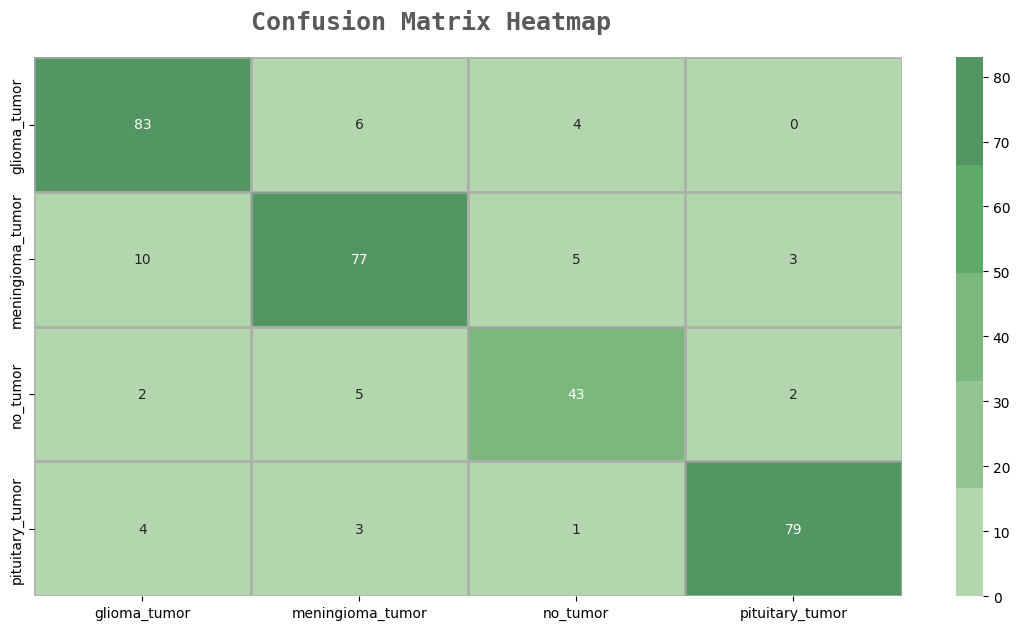

In [23]:
# Create a figure with one subplot and set the figure size
fig,ax=plt.subplots(1,1,figsize=(14,7))

# Plot a confusion matrix using seaborn's heatmap function
# confusion_matrix(y_test_new, pred): Compute the confusion matrix between the true labels and predicted labels
# xticklabels=tumor_labels, yticklabels=tumor_labels: Set the tick labels on the x and y axes as tumor_labels
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=tumor_labels,yticklabels=tumor_labels,annot=True,
           cmap=green_palette[::-1],alpha=0.7,linewidths=2,linecolor=dark_palette[1])

# Add header to the figure
fig.text(s='Confusion Matrix Heatmap',size=18,fontweight='bold',
             fontname='monospace',color=dark_palette[0],y=0.92,x=0.28,alpha=0.8)

# Show the plot
plt.show()